# Modell zum Lernen der Fibonacci Sequenz

[Wikipedia - Fibonacci sequence](https://en.wikipedia.org/wiki/Fibonacci_sequence)

In [63]:
# Importieren der benötigten Bibliotheken
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [64]:
# Funktion zum Erzeugen der Fibonacci Reihe bzw. der 
# Trainingsdaten:
# X = zwei vorausgehende Zahlen
# Y = Summe aus X

def get_fibonacci_data(len):
  x_matrix = []
  y = []

  # begin
  x_matrix.append([0, 1])
  y.append([sum(x_matrix[0])])

  for i in range(1, len):
    previous_entry = i - 1
    x_next = [x_matrix[previous_entry][1], y[previous_entry][0]]
    x_matrix.append(x_next)
    y.append([sum(x_next)])
  return np.array(y).squeeze(), np.array(x_matrix).squeeze() # return y, x

In [65]:
y_train, x_train= get_fibonacci_data(10)
x_train

array([[ 0,  1],
       [ 1,  1],
       [ 1,  2],
       [ 2,  3],
       [ 3,  5],
       [ 5,  8],
       [ 8, 13],
       [13, 21],
       [21, 34],
       [34, 55]])

In [66]:
y_train

array([ 1,  2,  3,  5,  8, 13, 21, 34, 55, 89])

In [67]:
#Für Reproduzierbarkeit
# https://keras.io/examples/keras_recipes/reproducibility_recipes/
keras.utils.set_random_seed(1234)
tf.config.experimental.enable_op_determinism()

n_units = 100

model = keras.Sequential()
model.add(keras.layers.Input(shape=(2, ), name="InputLayer"))
model.add(keras.layers.Dense(units=n_units, activation='relu', name="HL1"))
model.add(keras.layers.Dense(units=n_units, activation='relu', name="HL2"))
model.add(keras.layers.Dense(units=1, name="OutputLayer"))

model.compile(
  optimizer='adam',
  loss='mean_squared_error',
  metrics=['mae']
)

model.summary()


Model: "sequential_7"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape            ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ HL1 (Dense)                     │ (None, 100)             │           300 │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ HL2 (Dense)                     │ (None, 100)             │        10,100 │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 1)               │           101 │
└─────────────────────────────────┴─────────────────────────┴───────────────┘
 Total params: 10,501 (41.02 KB)
 Trainable params: 10,501 (41.02 KB)
 Non-trainable params: 0 (0.00 B)


In [68]:
# Erzeugen der Trainingsdaten
y_train, x_train= get_fibonacci_data(50)

In [69]:
y_train

array([          1,           2,           3,           5,           8,
                13,          21,          34,          55,          89,
               144,         233,         377,         610,         987,
              1597,        2584,        4181,        6765,       10946,
             17711,       28657,       46368,       75025,      121393,
            196418,      317811,      514229,      832040,     1346269,
           2178309,     3524578,     5702887,     9227465,    14930352,
          24157817,    39088169,    63245986,   102334155,   165580141,
         267914296,   433494437,   701408733,  1134903170,  1836311903,
        2971215073,  4807526976,  7778742049, 12586269025, 20365011074])

In [70]:
x_train

array([[          0,           1],
       [          1,           1],
       [          1,           2],
       [          2,           3],
       [          3,           5],
       [          5,           8],
       [          8,          13],
       [         13,          21],
       [         21,          34],
       [         34,          55],
       [         55,          89],
       [         89,         144],
       [        144,         233],
       [        233,         377],
       [        377,         610],
       [        610,         987],
       [        987,        1597],
       [       1597,        2584],
       [       2584,        4181],
       [       4181,        6765],
       [       6765,       10946],
       [      10946,       17711],
       [      17711,       28657],
       [      28657,       46368],
       [      46368,       75025],
       [      75025,      121393],
       [     121393,      196418],
       [     196418,      317811],
       [     317811,

In [71]:
# Model Training
max_epochs = 1000
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=max_epochs * 0.1, # 10% von max_epochs
    restore_best_weights=True
)


history = model.fit(
  x=x_train,
  y=y_train,
  batch_size=48,
  validation_split=0.2,
  epochs=max_epochs,
  callbacks=[early_stopping]
)
model.summary()

Epoch 1/1000


2025-10-25 09:55:22.001260: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step - loss: 1010505745432576.0000 - mae: 10344771.0000 - val_loss: 56160736176286728192.0000 - val_mae: 4838009344.0000
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 928215245783040.0000 - mae: 9914614.0000 - val_loss: 51682829936634101760.0000 - val_mae: 4641126912.0000
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 854205107535872.0000 - mae: 9511139.0000 - val_loss: 47384825789518184448.0000 - val_mae: 4443957760.0000
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 783168563052544.0000 - mae: 9107078.0000 - val_loss: 43357877646928117760.0000 - val_mae: 4250933760.0000
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 716611736567808.0000 - mae: 8711510.0000 - val_loss: 39430444102744801280.0000 - val_mae: 4053835776.0000
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 651699882557440.0000 - mae: 8307593.5000 - val_loss: 35651286298636845056.0000 - val_mae: 3854675968.0000
Epoch 7/1000
1/1 ━━━

In [72]:
# Beste Epoche
val_losses = history.history['val_loss']
min_val_loss = min(val_losses)
best_epoch_index = val_losses.index(min_val_loss)
best_epoch = best_epoch_index + 1
best_epoch

483

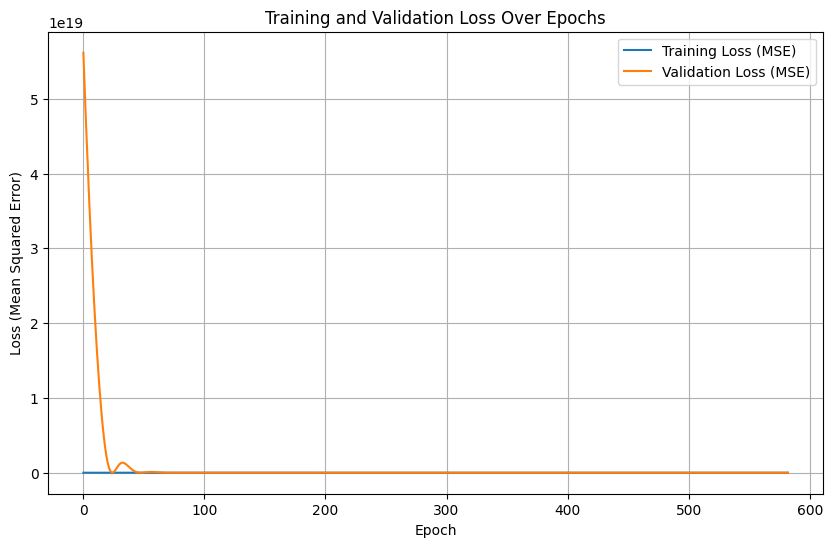

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
def prediction(array):
  pred = model.predict(array)
  print(f"Prediction: {pred}   ----   Ground-Truth: {int(np.sum(array))}")


In [75]:
prediction(np.array([[0, 1]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: [[1.2307082]]   ----   Ground-Truth: 1


2025-10-25 09:55:59.304707: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


In [76]:
prediction(np.array([[1, 1]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: [[2.1069608]]   ----   Ground-Truth: 2


In [77]:
prediction(np.array([[2, 3]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction: [[5.2122865]]   ----   Ground-Truth: 5


In [78]:
prediction(np.array([[17711, 28657]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: [[46368.258]]   ----   Ground-Truth: 46368


2025-10-25 09:56:14.644655: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
